 Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [2]:
!pip install imblearn

In [3]:
!pip install xgboost

In [4]:
!pip install lightgbm

In [5]:
!pip install shap

importing processed train data

In [6]:

df = pd.read_csv("C:/Users/ANUPRIYA/Desktop/Cybersecurity/traindata_processed.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,180388628218,0,612,123247,7,6,10,2,15,1,27,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,3,4,2024,6,21915
1,455266534868,88,326,210035,58,43,7,1,32,0,360606,160396,24887,153085,529644,1631,860,3421,881,289573,3586,66,10630,14,2024,3,10885
2,1056561957389,809,58352,712507,423,298,10,1,31,1,360606,68652,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,13,2024,4,17575
3,1279900258736,92,32992,774301,2,2,1,0,31,1,360606,13,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,10,2024,16,59976
4,214748368522,148,4359,188041,9,74,6,2,32,0,360606,160396,479,153085,529644,1631,860,3421,881,289573,3586,66,10630,15,2024,1,4087


In [7]:
traindata = pd.read_csv("C:/Users/ANUPRIYA/Desktop/Cybersecurity/traindata_processed.csv")

In [8]:
traindata.shape

(8922805, 27)

Defining features (X) and target (y)

In [9]:
X = traindata.drop(columns=['IncidentGrade','Id'])  
y = traindata['IncidentGrade']  

In [10]:
# Stratified train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [11]:
# Checking class distribution in training and validation sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Validation set class distribution:\n", y_val.value_counts(normalize=True))

Training set class distribution:
 IncidentGrade
0    0.428991
2    0.351921
1    0.219088
Name: proportion, dtype: float64
Validation set class distribution:
 IncidentGrade
0    0.428991
2    0.351921
1    0.219088
Name: proportion, dtype: float64


 Baseline Models 

In [12]:
# Baseline Models
baseline_models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

# Training and evaluation on validation set
for name, model in baseline_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name} Classification Report:\n", classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Training Logistic Regression...


c:\Users\ANUPRIYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

     Class 0       0.61      0.45      0.51   1148340
     Class 1       0.34      0.34      0.34    586464
     Class 2       0.53      0.70      0.60    942038

    accuracy                           0.51   2676842
   macro avg       0.49      0.50      0.49   2676842
weighted avg       0.52      0.51      0.51   2676842


Training Decision Tree...
Decision Tree Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00   1148340
     Class 1       0.99      0.99      0.99    586464
     Class 2       1.00      1.00      1.00    942038

    accuracy                           1.00   2676842
   macro avg       1.00      1.00      1.00   2676842
weighted avg       1.00      1.00      1.00   2676842



In [13]:
# Optimize data types
traindata = traindata.astype('float32')

# Train in batches
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
batch_size = 100000

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Feature and target selection
X = traindata.drop(columns=['IncidentGrade', 'Id'])  # Exclude target and unnecessary columns
y = traindata['IncidentGrade']  # Target column

# Stratified train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Advanced models definition
advanced_models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,      # Reduce number of trees for faster training
        max_depth=10,          # Limit tree depth to save resources
        class_weight='balanced',
        max_features='sqrt',   # Use a subset of features
        n_jobs=-1,             # Use all CPU cores
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,      # Reduce number of trees
        max_depth=5,           # Limit tree depth
        random_state=42
    )
}

# Train and evaluate models
for name, model in advanced_models.items():
    print(f"\nTraining {name}...")
    
    # Model training
    model.fit(X_train, y_train)
    
    # Predictions on validation data
    y_pred = model.predict(X_val)
    
    # Classification report
    print(f"{name} Classification Report:\n", classification_report(y_val, y_pred))



Training Random Forest...
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.95      0.83   1148340
         1.0       0.83      0.72      0.77    586464
         2.0       0.97      0.73      0.83    942038

    accuracy                           0.82   2676842
   macro avg       0.85      0.80      0.81   2676842
weighted avg       0.84      0.82      0.82   2676842


Training Gradient Boosting...


KeyboardInterrupt: 

In [15]:
# Sample 20% of the training data
X_train_sample = X_train.sample(frac=0.01, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [16]:
# Check the sizes
print("Original Training Data Size:", X_train.shape)
print("Sampled Training Data Size:", X_train_sample.shape)

Original Training Data Size: (6245963, 25)
Sampled Training Data Size: (62460, 25)


SMOTE

In [17]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sample, y_train_sample)

In [18]:
# Checking the new class distribution
print("Original class distribution:\n", y_train_sample.value_counts())
print("After SMOTE class distribution:\n", y_train_smote.value_counts())

Original class distribution:
 IncidentGrade
0.0    26765
2.0    21941
1.0    13754
Name: count, dtype: int64
After SMOTE class distribution:
 IncidentGrade
2.0    26765
0.0    26765
1.0    26765
Name: count, dtype: int64


Training RF model on class balanced data

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Training the Random Forest model
rf = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters as needed
rf.fit(X_train_smote, y_train_smote)

# Prediction on the validation set
y_val_pred = rf.predict(X_val)

# Evaluate performance
print("Validation Set Classification Report (After SMOTE):")
print(classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Validation Set Classification Report (After SMOTE):
              precision    recall  f1-score   support

     Class 0       0.89      0.93      0.91   1148340
     Class 1       0.87      0.86      0.87    586464
     Class 2       0.94      0.89      0.92    942038

    accuracy                           0.90   2676842
   macro avg       0.90      0.90      0.90   2676842
weighted avg       0.90      0.90      0.90   2676842



C:\Users\ANUPRIYA\AppData\Local\Temp\ipykernel_20284\1175307835.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


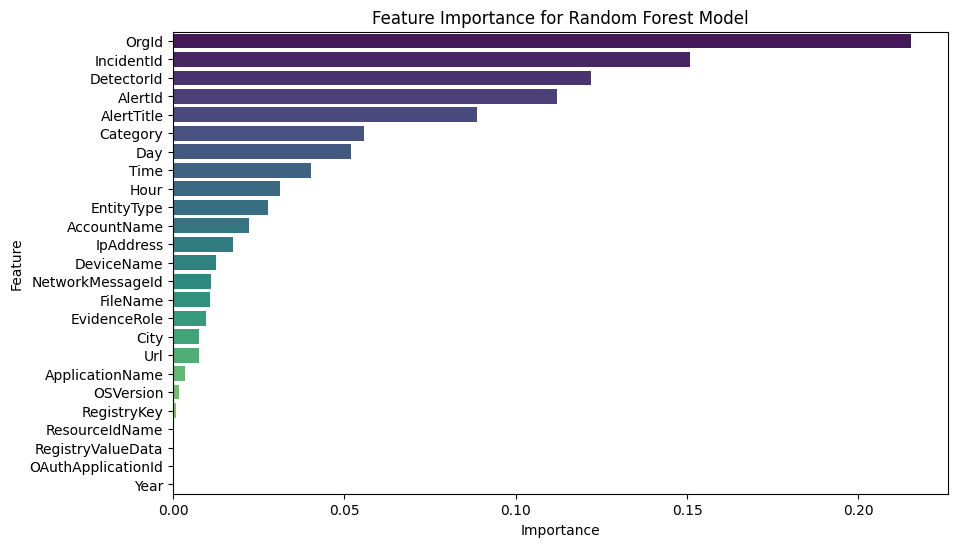

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
features = X_train_smote.columns  # Assuming X_train_smote is a DataFrame
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [21]:
# Defining top 10 features based on important feature
top_10_features = ['OrgId', 'IncidentId', 'AlertTitle', 'DetectorId', 
                   'AlertId', 'Category', 'Hour', 'Time', 'Day', 'EntityType']


In [22]:
# Filter datasets for top 11 features
X_train_top10 = X_train_smote[top_10_features]
X_val_top10 = X_val[top_10_features]

In [23]:
# Verify shapes
print("Shape of training set with top features:", X_train_top10.shape)
print("Shape of validation set with top features:", X_val_top10.shape)

Shape of training set with top features: (80295, 10)
Shape of validation set with top features: (2676842, 10)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model with top 11 features
rf_top10 = RandomForestClassifier(random_state=42)  # You can tune hyperparameters as needed
rf_top10.fit(X_train_top10, y_train_smote)

# Predict on the validation set
y_val_pred_top10 = rf_top10.predict(X_val_top10)

# Evaluate performance
print("Validation Set Classification Report (Top 11 Features):")
print(classification_report(y_val, y_val_pred_top10, target_names=['Class 0', 'Class 1', 'Class 2']))


Validation Set Classification Report (Top 11 Features):
              precision    recall  f1-score   support

     Class 0       0.91      0.94      0.93   1148340
     Class 1       0.88      0.89      0.89    586464
     Class 2       0.95      0.91      0.93    942038

    accuracy                           0.92   2676842
   macro avg       0.91      0.91      0.91   2676842
weighted avg       0.92      0.92      0.92   2676842



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define hyperparameter grid for Random Forest
param_distributions_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for split
    'bootstrap': [True, False],  # Whether to use bootstrap samples
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Handling class imbalance
}

# Randomized search for Random Forest
random_search_rf_top10 = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions_rf,
    scoring='f1_macro',  # Use macro F1-score for evaluation
    cv=3,
    n_iter=20,  # Number of random combinations
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform hyperparameter tuning
random_search_rf_top10.fit(X_train_top10, y_train_smote)

# Get the best model
best_rf_top10 = random_search_rf_top10.best_estimator_
print("Best Parameters:", random_search_rf_top10.best_params_)

# Evaluate on validation set
y_val_pred_best_rf_top10 = best_rf_top10.predict(X_val_top10)
print("Validation Set Classification Report (Tuned Top 11 Features):")
print(classification_report(y_val, y_val_pred_best_rf_top10, target_names=['Class 0', 'Class 1', 'Class 2']))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced_subsample', 'bootstrap': False}
Validation Set Classification Report (Tuned Top 11 Features):
              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93   1148340
     Class 1       0.89      0.89      0.89    586464
     Class 2       0.95      0.92      0.93    942038

    accuracy                           0.92   2676842
   macro avg       0.92      0.92      0.92   2676842
weighted avg       0.92      0.92      0.92   2676842



The hyperparameter tuned model gives best scores. Saving the model.

In [26]:

import joblib

# Save the model
joblib.dump(best_rf_top10, 'best_Random_forest_Classification_model_SMOTE.pkl')
print("Model saved as best_Random_forest_Classification_model_SMOTE.pkl")

Model saved as best_Random_forest_Classification_model_SMOTE.pkl


Final Evaluation on Test Set

In [28]:
# Loading test data
test_data = pd.read_csv("C:/Users/ANUPRIYA/Desktop/Cybersecurity/testdata_processed.csv")
test_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,360606,160396,863,153085,529644,1631,860,3421,881,289573,3586,66,10630,4,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,360606,160396,453297,2833,529644,1631,860,3421,881,289573,3586,0,10630,3,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,360606,160396,453297,153085,529644,1631,860,3421,881,14,3586,66,10630,8,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,360606,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,12,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,360606,160396,136104,153085,529644,1631,860,3421,881,289573,3586,66,10630,6,2024,17,63665


In [29]:
# Selecting only top 10 features and setting features and target
X_test_top10 = test_data[top_10_features] 
y_test = test_data['IncidentGrade']

In [30]:
# Predicting on the test set using the best model
y_test_pred_top10 = best_rf_top10.predict(X_test_top10)

# Evaluate performance on test data
print("Test Set Classification Report (Top 10 Features):")
print(classification_report(y_test, y_test_pred_top10, target_names=['Class 0', 'Class 1', 'Class 2']))

Test Set Classification Report (Top 10 Features):
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.88   1752895
     Class 1       0.80      0.85      0.83    902664
     Class 2       0.91      0.89      0.90   1492329

    accuracy                           0.88   4147888
   macro avg       0.87      0.87      0.87   4147888
weighted avg       0.88      0.88      0.88   4147888

